In [441]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Dataset Instruction
**This dataset is about Montgomery County, MD, goverment employee information. The dataset includs every employee's job status and the salary in gender. In this project, I follow data analysis workflow to step by step completeing my analysis. The steps are listed below.**
    
    1. Data Extraction
    2. Data Cleanup
    3. Data Visualization
    4. Descriptive Analytics
    

# Data Extraction

## Idea

**Before clean up the data, I read the URL dataset by pd.read_csv() to perform the first 5 rows into Jupyter Notebook. As we can see the dataset, the column of Department and Position Under-Filled are not meaningful because we can clearly notice that the information in Department column is a abbreviation of Department Name. Also, most of the data in Position Under-Filled column are NaN. I can conclude that these two columns could be drop off. Therefore, we can focus on other column for further analysis.**

In [442]:
url = "https://data.montgomerycountymd.gov/api/views/2qd6-mr43/rows.csv?accessType=DOWNLOAD"
data = pd.read_csv(url)
data.head()

,Full Name,Gender,Current Annual Salary,2017 Gross Pay Received,2017 Overtime Pay,Department,Department Name,Division,Assignment Category,Employee Position Title,Position Under-Filled,Date First Hired
0,"Aarhus, Pam J.",F,70959.79,71316.72,0.00,POL,Department of Police,MSB Information Mgmt and Tech Division Records...,Fulltime-Regular,Office Services Coordinator,NaN,09/22/1986
1,"Aaron, Marsha M.",F,110359.00,108040.82,0.00,HHS,Department of Health and Human Services,Adult Protective and Case Management Services,Fulltime-Regular,Supervisory Social Worker,NaN,11/19/1989
2,"Ababio, Godfred A.",M,55950.24,62575.19,7649.19,COR,Correction and Rehabilitation,PRRS Facility and Security,Fulltime-Regular,Resident Supervisor II,NaN,05/05/2014
3,"Ababu, Essayas",M,95740.00,96055.94,0.00,HCA,Department of Housing and Community Affairs,Affordable Housing Programs,Fulltime-Regular,Planning Specialist III,NaN,03/05/2007
4,"Abbamonte, Drew B.",M,74732.00,98736.78,23468.73,POL,Department of Police,PSB 6th District Special Assignment Team,Fulltime-Regular,Police Officer III,NaN,07/16/2007


In [443]:
data.shape

(9398, 12)

In [444]:
data.ndim

2

In [445]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9398 entries, 0 to 9397
Data columns (total 12 columns):
Full Name                  9398 non-null object
Gender                     9398 non-null object
Current Annual Salary      9398 non-null float64
2017 Gross Pay Received    9398 non-null float64
2017 Overtime Pay          9398 non-null float64
Department                 9398 non-null object
Department Name            9398 non-null object
Division                   9398 non-null object
Assignment Category        9398 non-null object
Employee Position Title    9398 non-null object
Position Under-Filled      1088 non-null object
Date First Hired           9398 non-null object
dtypes: float64(3), object(9)
memory usage: 881.2+ KB


# Data cleanup

## Checking the missing value

**In order to determine missing value, the ```isnull()``` function is a easy method to check whether the missing value is in the dataset. Values in the dataset could be any types. Therefore, the fastest way to determine any value is ```values.any()```.**



**The result is Ture which means there are some missing value in the dataset. Next, we can determine the column that should be deleted.**

In [446]:
data.isnull().values.any()

True

## Adding or deleting specfic columms

**For the following questions to be considered, the columns listed below are useless for answering the questions. Therefore, I decided to delete those columns to perform clean dataset.**

In [447]:
data.drop(['Position Under-Filled', 'Department', 'Employee Position Title', 'Division'], axis = 1, inplace = True)
data.head()

,Full Name,Gender,Current Annual Salary,2017 Gross Pay Received,2017 Overtime Pay,Department Name,Assignment Category,Date First Hired
0,"Aarhus, Pam J.",F,70959.79,71316.72,0.00,Department of Police,Fulltime-Regular,09/22/1986
1,"Aaron, Marsha M.",F,110359.00,108040.82,0.00,Department of Health and Human Services,Fulltime-Regular,11/19/1989
2,"Ababio, Godfred A.",M,55950.24,62575.19,7649.19,Correction and Rehabilitation,Fulltime-Regular,05/05/2014
3,"Ababu, Essayas",M,95740.00,96055.94,0.00,Department of Housing and Community Affairs,Fulltime-Regular,03/05/2007
4,"Abbamonte, Drew B.",M,74732.00,98736.78,23468.73,Department of Police,Fulltime-Regular,07/16/2007


**From the dataset, the government gernerated the detail information of Gross Pay and Overtime Pay for each employee. I used the following mehtod to create and name the new column for the Total number of the Gross Pay**

In [448]:
data['Total 2017 Gross Pay Received'] = data['2017 Gross Pay Received'] + data['2017 Overtime Pay']
data.head()

,Full Name,Gender,Current Annual Salary,2017 Gross Pay Received,2017 Overtime Pay,Department Name,Assignment Category,Date First Hired,Total 2017 Gross Pay Received
0,"Aarhus, Pam J.",F,70959.79,71316.72,0.00,Department of Police,Fulltime-Regular,09/22/1986,71316.72
1,"Aaron, Marsha M.",F,110359.00,108040.82,0.00,Department of Health and Human Services,Fulltime-Regular,11/19/1989,108040.82
2,"Ababio, Godfred A.",M,55950.24,62575.19,7649.19,Correction and Rehabilitation,Fulltime-Regular,05/05/2014,70224.38
3,"Ababu, Essayas",M,95740.00,96055.94,0.00,Department of Housing and Community Affairs,Fulltime-Regular,03/05/2007,96055.94
4,"Abbamonte, Drew B.",M,74732.00,98736.78,23468.73,Department of Police,Fulltime-Regular,07/16/2007,122205.51


# Descriptive Analytics and Data Visualization

**The fastest method to display the statistic is the '''describe()''' function. The result showed below. In the dataframe below, the value of Total Gross Pay is higher than the Current Annual Salary because in 2017, employees were work overtime. This may tell us the efficiency need to be improve. The min value of Total 2017 Gross Pay is 0 because some staffs did not work overtime.**

In [449]:
data.describe()

,Current Annual Salary,2017 Gross Pay Received,2017 Overtime Pay,Total 2017 Gross Pay Received
count,9398.000000,9398.000000,9398.000000,9398.000000
mean,75571.149354,79651.300220,7001.849431,86653.149651
std,29875.189537,36965.189238,12248.901787,44244.655951
min,11147.240000,0.000000,-2430.110000,0.000000
25%,53747.000000,55561.675000,0.000000,58945.220000
50%,71495.000000,76972.330000,1592.405000,82107.555000
75%,95084.420000,101210.797500,9189.180000,107536.277500
max,303091.000000,315216.400000,125274.890000,392087.170000


**Next, I want to perform the amount of difference in this histogram. Although, we could not directly know the exact number of male and female, we are able to immediately conclude that the number of male in every department is higher than female.**

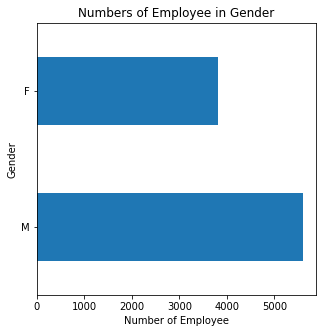

In [450]:
total_number = data.groupby('Gender')['Department Name'].count()
fig1, ax = plt.subplots(figsize=(5,5))
ax = total_number.plot.barh()
ax.set_title('Numbers of Employee in Gender')
ax.invert_yaxis()  
ax.set_xlabel('Number of Employee')
plt.show()

**In this pie chart, the percentage of male is greater than female 9 percent.**

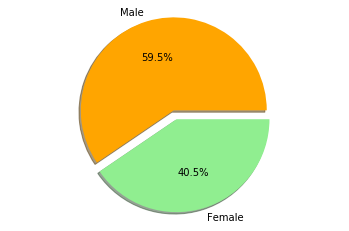

In [451]:
labels = 'Male', 'Female'
sizes = [5592, 3806]
colors = ['orange', 'lightgreen']
explode = (0.1,0)
plt.pie(sizes, labels = labels, colors = colors, autopct='%1.1f%%', shadow = True, explode = explode)
plt.axis('equal')
plt.show()

In [452]:
data['Count'] = 1
data.head()

,Full Name,Gender,Current Annual Salary,2017 Gross Pay Received,2017 Overtime Pay,Department Name,Assignment Category,Date First Hired,Total 2017 Gross Pay Received,Count
0,"Aarhus, Pam J.",F,70959.79,71316.72,0.00,Department of Police,Fulltime-Regular,09/22/1986,71316.72,1
1,"Aaron, Marsha M.",F,110359.00,108040.82,0.00,Department of Health and Human Services,Fulltime-Regular,11/19/1989,108040.82,1
2,"Ababio, Godfred A.",M,55950.24,62575.19,7649.19,Correction and Rehabilitation,Fulltime-Regular,05/05/2014,70224.38,1
3,"Ababu, Essayas",M,95740.00,96055.94,0.00,Department of Housing and Community Affairs,Fulltime-Regular,03/05/2007,96055.94,1
4,"Abbamonte, Drew B.",M,74732.00,98736.78,23468.73,Department of Police,Fulltime-Regular,07/16/2007,122205.51,1


**To calculate the numbers of employee by fulltime and parttime in gender, the '''groupby()''' function can perform the selected column with '''sum()''' function to calculate the total.**

In [453]:
condition = data.groupby(['Gender','Assignment Category']).sum()['Count']
condition

Gender  Assignment Category
F       Fulltime-Regular       3132
        Parttime-Regular        674
M       Fulltime-Regular       5431
        Parttime-Regular        161
Name: Count, dtype: int64

**The following pie chart performs the percentage by part-time and full-time in gender. The data is derid from the code below. The pie chart easily display each portion clearly.**

Gender  Assignment Category
F       Fulltime-Regular       3132
        Parttime-Regular        674
M       Fulltime-Regular       5431
        Parttime-Regular        161
Name: Count, dtype: int64


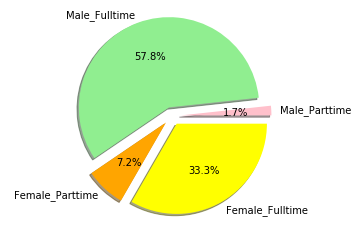

In [454]:
condition = data.groupby(['Gender','Assignment Category']).sum()['Count']
print(condition)
labels = 'Male_Parttime', 'Male_Fulltime', 'Female_Parttime', 'Female_Fulltime'
sizes = [161, 5431, 674 ,3132]
colors = ['pink', 'lightgreen', 'orange', 'yellow']
explode = (0.1, 0.1, 0.1, 0.1)
plt.pie(sizes, labels = labels, colors = colors, autopct='%1.1f%%', shadow = True, explode = explode)
plt.axis('equal')
plt.show()

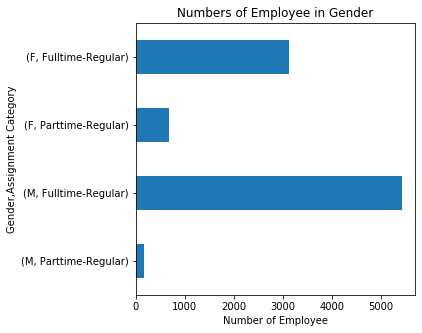

In [455]:
fig2, ax = plt.subplots(figsize=(5,5))
ax = condition.plot.barh()
ax.set_title('Numbers of Employee in Gender')
ax.invert_yaxis()  
ax.set_xlabel('Number of Employee')
plt.show()

**For showing more clear on total 2017 gross pay in distplot, first, I create two dataframe that divide into full-time and part-time. Then uses the two dataframe to display the displots. As you can see, in full-time job, male earns more than female in the range of higher salary. Then the distplot shows skewed to the right. This tells us most of the employees earns below medium salary.**

In [456]:
FT = data[data['Assignment Category'] != 'Parttime-Regular']
FT.head()

,Full Name,Gender,Current Annual Salary,2017 Gross Pay Received,2017 Overtime Pay,Department Name,Assignment Category,Date First Hired,Total 2017 Gross Pay Received,Count
0,"Aarhus, Pam J.",F,70959.79,71316.72,0.00,Department of Police,Fulltime-Regular,09/22/1986,71316.72,1
1,"Aaron, Marsha M.",F,110359.00,108040.82,0.00,Department of Health and Human Services,Fulltime-Regular,11/19/1989,108040.82,1
2,"Ababio, Godfred A.",M,55950.24,62575.19,7649.19,Correction and Rehabilitation,Fulltime-Regular,05/05/2014,70224.38,1
3,"Ababu, Essayas",M,95740.00,96055.94,0.00,Department of Housing and Community Affairs,Fulltime-Regular,03/05/2007,96055.94,1
4,"Abbamonte, Drew B.",M,74732.00,98736.78,23468.73,Department of Police,Fulltime-Regular,07/16/2007,122205.51,1


In [457]:
PT = data[data['Assignment Category'] != 'Fulltime-Regular']
PT.head()

,Full Name,Gender,Current Annual Salary,2017 Gross Pay Received,2017 Overtime Pay,Department Name,Assignment Category,Date First Hired,Total 2017 Gross Pay Received,Count
5,"Abbasian, Takin M.",M,16451.50,4547.10,94.92,Department of Police,Parttime-Regular,09/05/2017,4642.02,1
13,"Abebe, Emebet",F,22938.50,22001.04,135.76,Department of Health and Human Services,Parttime-Regular,05/01/2017,22136.80,1
14,"Abebe, Hiruth",F,156167.20,166653.59,0.00,Department of Health and Human Services,Parttime-Regular,12/01/2003,166653.59,1
21,"Abijomaa, Ida L.",F,15216.03,8201.30,0.00,Department of Public Libraries,Parttime-Regular,02/13/2013,8201.30,1
22,"Abijomaa, Ryan Z.",M,20033.12,21077.19,115.58,Department of Public Libraries,Parttime-Regular,11/22/2010,21192.77,1


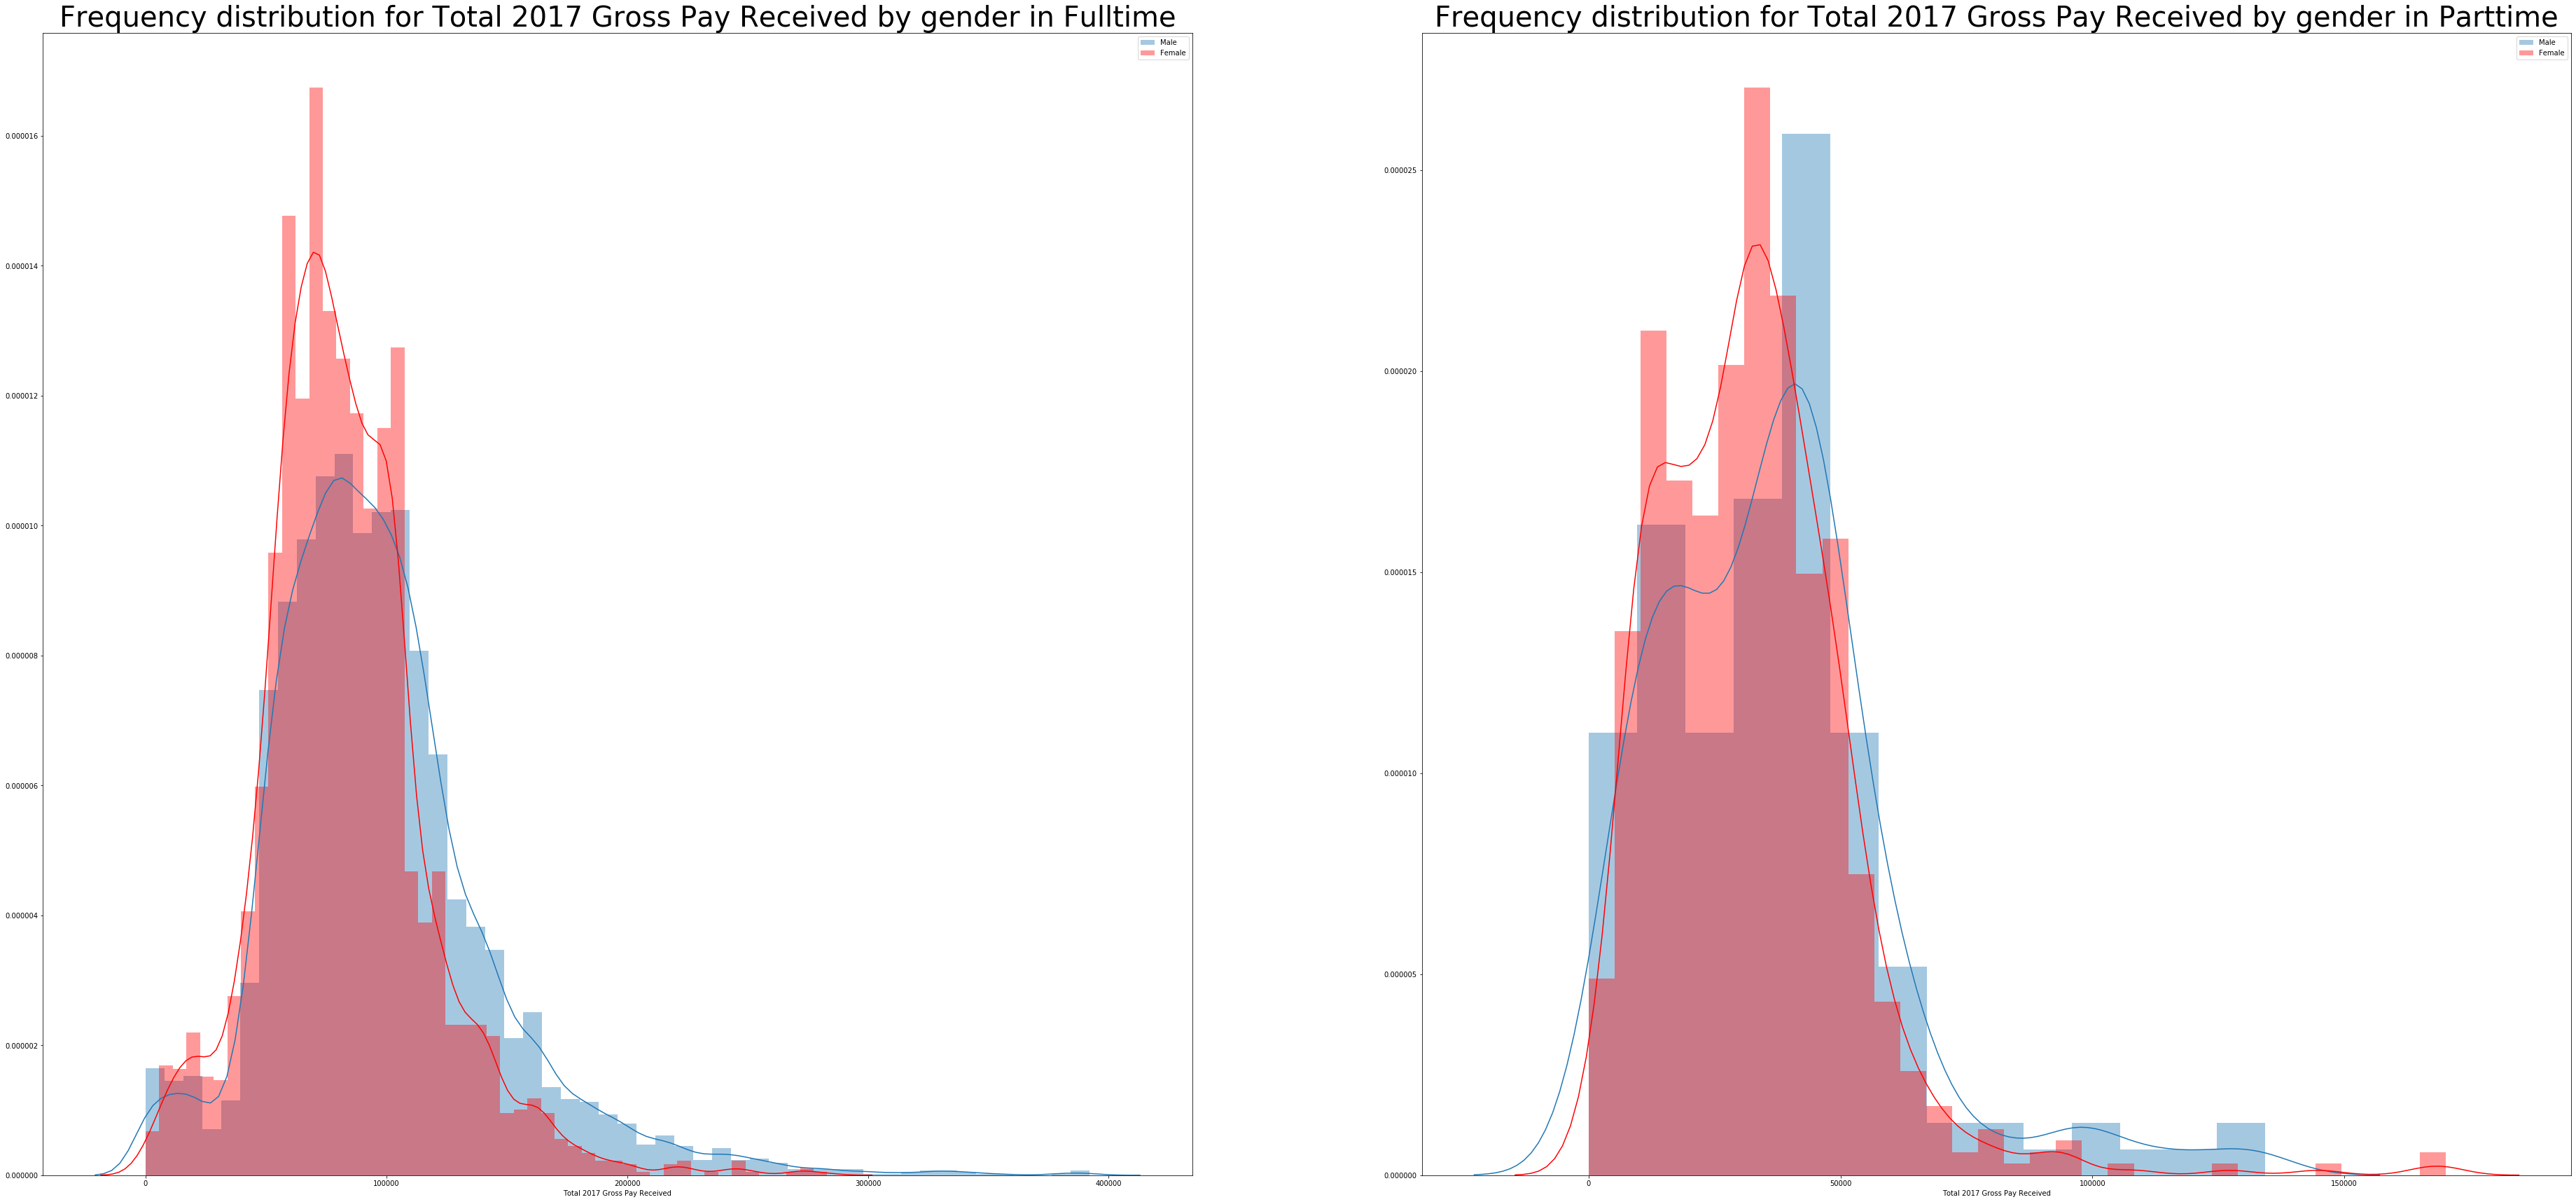

In [458]:
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt

plt.figure(figsize=(100,30))
plt.subplot(1,3,1,)
plt.title('Frequency distribution for Total 2017 Gross Pay Received by gender in Fulltime', fontsize=40)
male = FT.loc[FT['Gender']=='M','Total 2017 Gross Pay Received']
female = FT.loc[FT['Gender']=='F','Total 2017 Gross Pay Received']
sns.distplot(male)
sns.distplot(female, color='red')
plt.legend(['Male', 'Female'])

plt.subplot(1,3,2)
plt.title('Frequency distribution for Total 2017 Gross Pay Received by gender in Parttime', fontsize=40)
male = PT.loc[PT['Gender']=='M','Total 2017 Gross Pay Received']
female = PT.loc[PT['Gender']=='F','Total 2017 Gross Pay Received']
sns.distplot(male)
sns.distplot(female, color='red')
plt.legend(['Male', 'Female'])

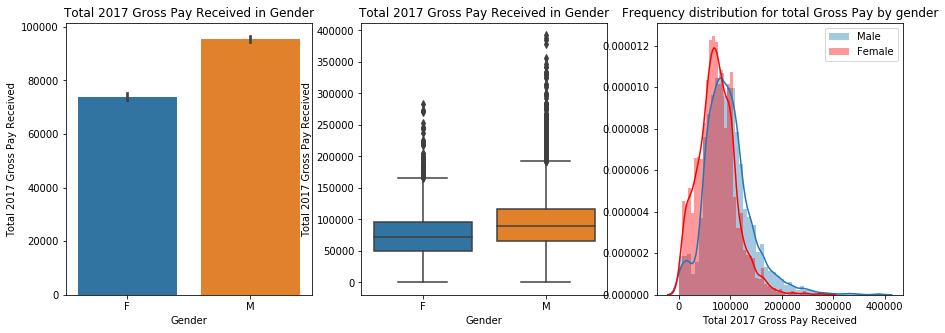

In [459]:
plt.figure(figsize=(15,5))
plt.subplot(1,3,1)
sns.barplot(x='Gender', y='Total 2017 Gross Pay Received',data=data)
plt.title('Total 2017 Gross Pay Received in Gender')

plt.subplot(1,3,2)
sns.boxplot(x='Gender', y='Total 2017 Gross Pay Received',data=data)
plt.title('Total 2017 Gross Pay Received in Gender')

plt.subplot(1,3,3)
plt.title('Frequency distribution for total Gross Pay by gender')
total_male = data.loc[data['Gender']=='M','Total 2017 Gross Pay Received']
totale_female = data.loc[data['Gender']=='F','Total 2017 Gross Pay Received']

sns.distplot(total_male)
sns.distplot(totale_female, color='red')
plt.legend(['Male', 'Female'])

**Categorizing by department name, I sort from the highest to the lowest for displaying the number of empolyee in each department. Using histograme can easily show the department that has highest number of staff.**

In [460]:
top_department = data.groupby('Department Name').Count.count().sort_values(ascending=False).iloc[:15]
top_department

Department Name
Department of Police                       1896
Department of Health and Human Services    1585
Fire and Rescue Services                   1323
Department of Transportation               1247
Correction and Rehabilitation               495
Department of Liquor Control                417
Department of General Services              408
Department of Public Libraries              376
Department of Permitting Services           214
Sheriff's Office                            194
Department of Environmental Protection      150
Department of Recreation                    144
Department of Technology Services           141
Department of Finance                       111
County Council                               89
Name: Count, dtype: int64

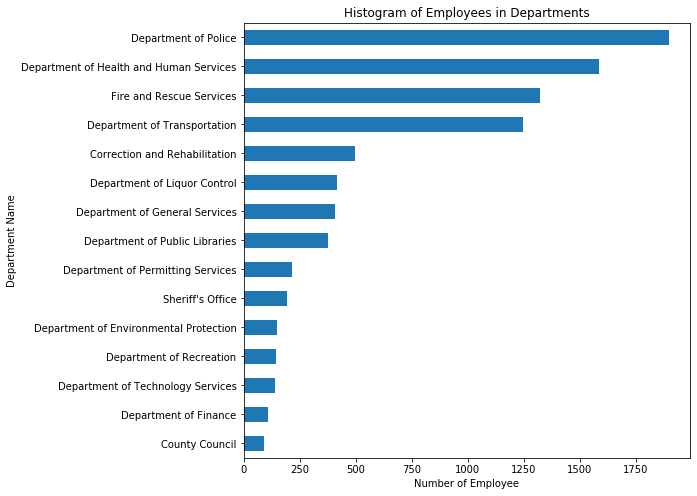

In [461]:
top_department = data.groupby('Department Name').Count.count().sort_values(ascending=False).iloc[:15]
top_department.head()
fig5, ax = plt.subplots(figsize=(8,8))
ax = top_department.plot.barh()
ax.set_title('Histogram of Employees in Departments')
ax.invert_yaxis()  
ax.set_xlabel('Number of Employee')
plt.show()